Start by opening the JSON file using Pandas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from tabulate import tabulate

from astropy.time import Time

In [15]:
df = pd.read_json('../../Preliminary_Data_Files/hits_collation.json')

ValueError: Expected object or value

In [8]:
#print(df.shape) #The shape of the data file is (5697746, 24)

#Define some of the parameters to look at the whole data file all at once
#print(df.iloc[1])
ra = df["ra"]
dec = df["dec"]
#print(df.iloc[3])

######### Now let's just look at the different beams of the first field of view #########
beam = np.array(df.iloc[:180]["beam"]).tolist()
print(len(np.array(df.iloc[:180]["startChannel"])))
#print(np.array(beam).tolist().count(0))
#print(np.array(beam).tolist().count(1))
#print(np.array(beam).tolist().count(2))
#print(np.array(beam).tolist().count(3))
#print(np.array(beam).tolist().count(4))
#print(np.array(beam).tolist().count(5))

Tsamp = np.array(df["tstart"])
print(np.max(Tsamp), np.min(Tsamp))
print(len(np.unique(Tsamp).tolist()))
#print(np.unique(Tsamp).tolist())

#Recall that there are 5 coherent beams (0-4) and one incoherent beam (5)

180
60006.31329548964 60006.076254917774
1721


In [15]:
######### Looking at the number of hits in each field of view #########
file_path = df["file_path"]
unique_file_path = np.unique(file_path) #the array of unique fields of view

print(len(np.unique(df.iloc[:]["ra"])))

#print(np.count_nonzero(file_path == unique_file_path[2]))
#print(file_path.tolist().count(file_path[23330]))
#print(range(len(np.unique(file_path))))

#for i in range(len(unique_file_path)):
    #fov_subset = df.loc[df['file_path'] == np.unique(file_path)[i]]
    
    #print(i, ' out of ', len(unique_file_path))


7295


In [5]:
signal_index = np.array(df["signal_index"]).tolist()
tstart = np.array(df["tstart"])
source = np.array(df["sourceName"])
print(tstart[signal_index.index(39691)])
print(tstart[signal_index.index(55130)])

print(source[signal_index.index(39691)], source[signal_index.index(55130)])

times = [tstart[signal_index.index(39691)], tstart[signal_index.index(55130)]]
diff_times = tstart[signal_index.index(66119)] - tstart[signal_index.index(62547)]
difference = diff_times*24*60*60 
print(diff_times*24*60*60, 'seconds')
t = Time(times, format = 'mjd')
print(t.iso)

print((-2486.477196e6+2486.504448e6)/difference)
#So in order for it to have drifted by that much within only 3 minutes, it would have had to have a drift rate of over 500,
#which is very much not the case

60006.07917389134
60006.07654618891
11423277273284480 11421451911507840
-264.08394277095795 seconds
['2023-03-03 01:54:00.624' '2023-03-03 01:50:13.591']
-103.19446049635768


In [5]:
print(np.unique(file_path)[1])
print(np.unique(file_path)[2])
print(np.unique(file_path)[623])

/mnt/cosmic-storage-1/data2/vlass_target/VLASS3.1.sb43447372.eb43676942.60006.055100046295/VLASS3.1.sb43447372.eb43676942.60006.055100046295.101.1/VLASS3.1.sb43447372.eb43676942.60006.055100046295.101.1.AC.C512.0001.seticore.hits
/mnt/cosmic-storage-1/data2/vlass_target/VLASS3.1.sb43447372.eb43676942.60006.055100046295/VLASS3.1.sb43447372.eb43676942.60006.055100046295.101.1/VLASS3.1.sb43447372.eb43676942.60006.055100046295.101.1.AC.C512.0002.seticore.hits
/mnt/cosmic-storage-1/data2/vlass_target/VLASS3.1.sb43447372.eb43676942.60006.055100046295/VLASS3.1.sb43447372.eb43676942.60006.055100046295.107.1/VLASS3.1.sb43447372.eb43676942.60006.055100046295.107.1.BD.C352.0011.seticore.hits


In [10]:
with open('../../Pickle_Files/fov_1.pkl', 'rb') as f:

    field_of_view_1 = pickle.load(f) # deserialize using load()

freq = field_of_view_1["signal_frequency"] #define just the column for frequencies
power = field_of_view_1["signal_power"] #define just the column for power
unique_freq = np.unique(freq) #find the array of unique frequencies

#Here we want to find how many hits each frequency had between the 5 coherent beams and the one incoherent beam
hits_per_freq = []
for i in range(len(unique_freq)):
    hits_per_freq.append(np.count_nonzero(freq == unique_freq[i]))

print(hits_per_freq)
#Define a dictionary to line these values up    
hits_in_unique_freqs = {'Unique Frequencies': unique_freq, 
                        'Hits per Frequency': hits_per_freq}

#Each frequency should have a maximum of 6 hits if it is widespread RFI
indices = np.where(np.array(hits_per_freq) < 6)
print(indices)
values_less_than_6 = np.array(unique_freq)[indices]
print(values_less_than_6)
print(np.array(hits_per_freq)[indices])

FileNotFoundError: [Errno 2] No such file or directory: '../../Pickle_Files/fov_1.pkl'

In [6]:
new_indices = np.where(np.isin(np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["signal_frequency"]), 
                      values_less_than_6) == True)
print(new_indices)

(array([ 84,  85,  86,  87,  94,  95, 144, 145, 146, 147, 148, 281, 282,
       283, 284, 291, 292, 341, 342, 343, 344, 345, 412, 413, 420, 421,
       422, 423, 436, 437, 438, 439, 440, 453, 454, 455, 456, 457, 458,
       459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469]),)


In [7]:
mydata = [np.array(beam).tolist()[0:8], np.array(freq).tolist()[0:8], np.array(power).tolist()[0:8]]
info = {'Beam Number': np.array(beam).tolist(), 
        'Frequency': np.array(freq).tolist(), 
        'Power': np.array(power).tolist()}

source_name = np.array(field_of_view_1["sourceName"])
print(np.unique(source_name))

#print(tabulate(info, headers='keys'))

['16384823493538944' '16386369681765120' '16433923559663616'
 '16434640818646528' '16434851272560768' 'Incoherent']


In [12]:
#print(field_of_view_1.iloc[0])

print(hits_per_freq)
#print(np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["beam"]))
#print(np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["signal_frequency"]))

info = {'Beam Number': np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["beam"])[new_indices], 
        'Frequency': np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["signal_frequency"])[new_indices], 
        'Power': np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["signal_snr"])[new_indices], 
       'Drift Rate': np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["signal_driftRate"])[new_indices],
       'Source Name': np.array(field_of_view_1.sort_values(by = ["signal_frequency", "beam"])["sourceName"])[new_indices]}

print(tabulate(info, headers='keys'))

anomalies = info

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 4, 6, 6, 2, 3, 6, 6, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 6]
  Beam Number    Frequency     Power    Drift Rate  Source Name
-------------  -----------  --------  ------------  -----------------
            0      2477.3   10.4772       0         16434851272560768
            1      2477.3    8.00939      0         16434640818646528
            3      2477.3    9.27958      0         16386369681765120
            5      2477.3    9.07796      0         Incoherent
            3      2477.35   8.7116       0         16386369681765120
            5      2477.35   8.04908      0         Incoherent
            1      2477.45   8.34095      0         16434640818646528
            2      2477.45  11.0846       0         16384823493538944
            3      2477.45  11.278   

Now we want to look at in the number of different fields of view each source is located.

In [8]:
source_name = np.unique(df["sourceName"])
print(len(source_name))
print(source_name[1])

fovs = np.array(np.where(df["sourceName"] == '13466960151652608')).tolist()
print(len(fovs[0]))

fields = np.unique(file_path[fovs[0]])
ras = np.unique(ra[fovs[0]])
decs = np.unique(dec[fovs[0]])
print(len(ras), len(decs))

7733
10106096702975616
541
1 1


0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123

924 done
925 done
926 done
927 done
928 done
929 done
930 done
931 done
932 done
933 done
934 done
935 done
936 done
937 done
938 done
939 done
940 done
941 done
942 done
943 done
944 done
945 done
946 done
947 done
948 done
949 done
950 done
951 done
952 done
953 done
954 done
955 done
956 done
957 done
958 done
959 done
960 done
961 done
962 done
963 done
964 done
965 done
966 done
967 done
968 done
969 done
970 done
971 done
972 done
973 done
974 done
975 done
976 done
977 done
978 done
979 done
980 done
981 done
982 done
983 done
984 done
985 done
986 done
987 done
988 done
989 done
990 done
991 done
992 done
993 done
994 done
995 done
996 done
997 done
998 done
999 done
1000 done
1001 done
1002 done
1003 done
1004 done
1005 done
1006 done
1007 done
1008 done
1009 done
1010 done
1011 done
1012 done
1013 done
1014 done
1015 done
1016 done
1017 done
1018 done
1019 done
1020 done
1021 done
1022 done
1023 done
1024 done
1025 done
1026 done
1027 done
1028 done
1029 done
1030 done
1031 d

1751 done
1752 done
1753 done
1754 done
1755 done
1756 done
1757 done
1758 done
1759 done
1760 done
1761 done
1762 done
1763 done
1764 done
1765 done
1766 done
1767 done
1768 done
1769 done
1770 done
1771 done
1772 done
1773 done
1774 done
1775 done
1776 done
1777 done
1778 done
1779 done
1780 done
1781 done
1782 done
1783 done
1784 done
1785 done
1786 done
1787 done
1788 done
1789 done
1790 done
1791 done
1792 done
1793 done
1794 done
1795 done
1796 done
1797 done
1798 done
1799 done
1800 done
1801 done
1802 done
1803 done
1804 done
1805 done
1806 done
1807 done
1808 done
1809 done
1810 done
1811 done
1812 done
1813 done
1814 done
1815 done
1816 done
1817 done
1818 done
1819 done
1820 done
1821 done
1822 done
1823 done
1824 done
1825 done
1826 done
1827 done
1828 done
1829 done
1830 done
1831 done
1832 done
1833 done
1834 done
1835 done
1836 done
1837 done
1838 done
1839 done
1840 done
1841 done
1842 done
1843 done
1844 done
1845 done
1846 done
1847 done
1848 done
1849 done
1850 done


2571 done
2572 done
2573 done
2574 done
2575 done
2576 done
2577 done
2578 done
2579 done
2580 done
2581 done
2582 done
2583 done
2584 done
2585 done
2586 done
2587 done
2588 done
2589 done
2590 done
2591 done
2592 done
2593 done
2594 done
2595 done
2596 done
2597 done
2598 done
2599 done
2600 done
2601 done
2602 done
2603 done
2604 done
2605 done
2606 done
2607 done
2608 done
2609 done
2610 done
2611 done
2612 done
2613 done
2614 done
2615 done
2616 done
2617 done
2618 done
2619 done
2620 done
2621 done
2622 done
2623 done
2624 done
2625 done
2626 done
2627 done
2628 done
2629 done
2630 done
2631 done
2632 done
2633 done
2634 done
2635 done
2636 done
2637 done
2638 done
2639 done
2640 done
2641 done
2642 done
2643 done
2644 done
2645 done
2646 done
2647 done
2648 done
2649 done
2650 done
2651 done
2652 done
2653 done
2654 done
2655 done
2656 done
2657 done
2658 done
2659 done
2660 done
2661 done
2662 done
2663 done
2664 done
2665 done
2666 done
2667 done
2668 done
2669 done
2670 done


3392 done
3393 done
3394 done
3395 done
3396 done
3397 done
3398 done
3399 done
3400 done
3401 done
3402 done
3403 done
3404 done
3405 done
3406 done
3407 done
3408 done
3409 done
3410 done
3411 done
3412 done
3413 done
3414 done
3415 done
3416 done
3417 done
3418 done
3419 done
3420 done
3421 done
3422 done
3423 done
3424 done
3425 done
3426 done
3427 done
3428 done
3429 done
3430 done
3431 done
3432 done
3433 done
3434 done
3435 done
3436 done
3437 done
3438 done
3439 done
3440 done
3441 done
3442 done
3443 done
3444 done
3445 done
3446 done
3447 done
3448 done
3449 done
3450 done
3451 done
3452 done
3453 done
3454 done
3455 done
3456 done
3457 done
3458 done
3459 done
3460 done
3461 done
3462 done
3463 done
3464 done
3465 done
3466 done
3467 done
3468 done
3469 done
3470 done
3471 done
3472 done
3473 done
3474 done
3475 done
3476 done
3477 done
3478 done
3479 done
3480 done
3481 done
3482 done
3483 done
3484 done
3485 done
3486 done
3487 done
3488 done
3489 done
3490 done
3491 done


4213 done
4214 done
4215 done
4216 done
4217 done
4218 done
4219 done
4220 done
4221 done
4222 done
4223 done
4224 done
4225 done
4226 done
4227 done
4228 done
4229 done
4230 done
4231 done
4232 done
4233 done
4234 done
4235 done
4236 done
4237 done
4238 done
4239 done
4240 done
4241 done
4242 done
4243 done
4244 done
4245 done
4246 done
4247 done
4248 done
4249 done
4250 done
4251 done
4252 done
4253 done
4254 done
4255 done
4256 done
4257 done
4258 done
4259 done
4260 done
4261 done
4262 done
4263 done
4264 done
4265 done
4266 done
4267 done
4268 done
4269 done
4270 done
4271 done
4272 done
4273 done
4274 done
4275 done
4276 done
4277 done
4278 done
4279 done
4280 done
4281 done
4282 done
4283 done
4284 done
4285 done
4286 done
4287 done
4288 done
4289 done
4290 done
4291 done
4292 done
4293 done
4294 done
4295 done
4296 done
4297 done
4298 done
4299 done
4300 done
4301 done
4302 done
4303 done
4304 done
4305 done
4306 done
4307 done
4308 done
4309 done
4310 done
4311 done
4312 done


5033 done
5034 done
5035 done
5036 done
5037 done
5038 done
5039 done
5040 done
5041 done
5042 done
5043 done
5044 done
5045 done
5046 done
5047 done
5048 done
5049 done
5050 done
5051 done
5052 done
5053 done
5054 done
5055 done
5056 done
5057 done
5058 done
5059 done
5060 done
5061 done
5062 done
5063 done
5064 done
5065 done
5066 done
5067 done
5068 done
5069 done
5070 done
5071 done
5072 done
5073 done
5074 done
5075 done
5076 done
5077 done
5078 done
5079 done
5080 done
5081 done
5082 done
5083 done
5084 done
5085 done
5086 done
5087 done
5088 done
5089 done
5090 done
5091 done
5092 done
5093 done
5094 done
5095 done
5096 done
5097 done
5098 done
5099 done
5100 done
5101 done
5102 done
5103 done
5104 done
5105 done
5106 done
5107 done
5108 done
5109 done
5110 done
5111 done
5112 done
5113 done
5114 done
5115 done
5116 done
5117 done
5118 done
5119 done
5120 done
5121 done
5122 done
5123 done
5124 done
5125 done
5126 done
5127 done
5128 done
5129 done
5130 done
5131 done
5132 done


5853 done
5854 done
5855 done
5856 done
5857 done
5858 done
5859 done
5860 done
5861 done
5862 done
5863 done
5864 done
5865 done
5866 done
5867 done
5868 done
5869 done
5870 done
5871 done
5872 done
5873 done
5874 done
5875 done
5876 done
5877 done
5878 done
5879 done
5880 done
5881 done
5882 done
5883 done
5884 done
5885 done
5886 done
5887 done
5888 done
5889 done
5890 done
5891 done
5892 done
5893 done
5894 done
5895 done
5896 done
5897 done
5898 done
5899 done
5900 done
5901 done
5902 done
5903 done
5904 done
5905 done
5906 done
5907 done
5908 done
5909 done
5910 done
5911 done
5912 done
5913 done
5914 done
5915 done
5916 done
5917 done
5918 done
5919 done
5920 done
5921 done
5922 done
5923 done
5924 done
5925 done
5926 done
5927 done
5928 done
5929 done
5930 done
5931 done
5932 done
5933 done
5934 done
5935 done
5936 done
5937 done
5938 done
5939 done
5940 done
5941 done
5942 done
5943 done
5944 done
5945 done
5946 done
5947 done
5948 done
5949 done
5950 done
5951 done
5952 done


6673 done
6674 done
6675 done
6676 done
6677 done
6678 done
6679 done
6680 done
6681 done
6682 done
6683 done
6684 done
6685 done
6686 done
6687 done
6688 done
6689 done
6690 done
6691 done
6692 done
6693 done
6694 done
6695 done
6696 done
6697 done
6698 done
6699 done
6700 done
6701 done
6702 done
6703 done
6704 done
6705 done
6706 done
6707 done
6708 done
6709 done
6710 done
6711 done
6712 done
6713 done
6714 done
6715 done
6716 done
6717 done
6718 done
6719 done
6720 done
6721 done
6722 done
6723 done
6724 done
6725 done
6726 done
6727 done
6728 done
6729 done
6730 done
6731 done
6732 done
6733 done
6734 done
6735 done
6736 done
6737 done
6738 done
6739 done
6740 done
6741 done
6742 done
6743 done
6744 done
6745 done
6746 done
6747 done
6748 done
6749 done
6750 done
6751 done
6752 done
6753 done
6754 done
6755 done
6756 done
6757 done
6758 done
6759 done
6760 done
6761 done
6762 done
6763 done
6764 done
6765 done
6766 done
6767 done
6768 done
6769 done
6770 done
6771 done
6772 done


7494 done
7495 done
7496 done
7497 done
7498 done
7499 done
7500 done
7501 done
7502 done
7503 done
7504 done
7505 done
7506 done
7507 done
7508 done
7509 done
7510 done
7511 done
7512 done
7513 done
7514 done
7515 done
7516 done
7517 done
7518 done
7519 done
7520 done
7521 done
7522 done
7523 done
7524 done
7525 done
7526 done
7527 done
7528 done
7529 done
7530 done
7531 done
7532 done
7533 done
7534 done
7535 done
7536 done
7537 done
7538 done
7539 done
7540 done
7541 done
7542 done
7543 done
7544 done
7545 done
7546 done
7547 done
7548 done
7549 done
7550 done
7551 done
7552 done
7553 done
7554 done
7555 done
7556 done
7557 done
7558 done
7559 done
7560 done
7561 done
7562 done
7563 done
7564 done
7565 done
7566 done
7567 done
7568 done
7569 done
7570 done
7571 done
7572 done
7573 done
7574 done
7575 done
7576 done
7577 done
7578 done
7579 done
7580 done
7581 done
7582 done
7583 done
7584 done
7585 done
7586 done
7587 done
7588 done
7589 done
7590 done
7591 done
7592 done
7593 done


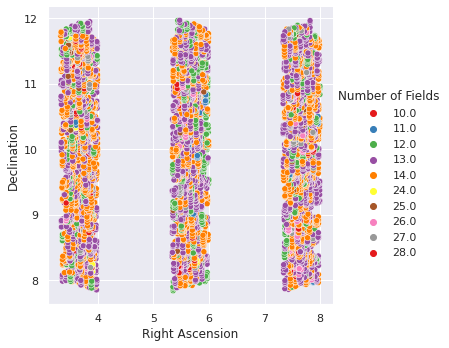

In [9]:
number_of_fovs = pd.DataFrame({'Source Name':[], 
                               'Number of Fields':[], 
                               'Right Ascension':[], 
                               'Declination':[]})

for i in range(len(source_name)):
    fovs = np.array(np.where(df["sourceName"] == source_name[i])).tolist()
    fields = np.unique(file_path[fovs[0]])
    #print(fields)
    ras = np.unique(ra[fovs[0]])
    decs = np.unique(dec[fovs[0]])
    #print(i, source_name[i], len(fields))
    
    list = [source_name[i], len(fields), ras[0], decs[0]]

    number_of_fovs.loc[len(number_of_fovs)] = list
    
    print(i, 'done')
    
sns.set_theme()
g = sns.relplot(data=number_of_fovs[0:-1], x="Right Ascension", y="Declination", hue="Number of Fields", palette = 'Set1')

with open('unique_fields.pkl', 'wb') as f:  # open a text file
    pickle.dump(number_of_fovs, f) # serialize the list
f.close()

In [12]:
display(number_of_fovs[0:12])

,Source Name,Number of Fields,Right Ascension,Declination
0,10061016726276864,14.0,3.491587,7.99577
1,10106096702975616,13.0,3.465247,8.03126
2,10109429597635840,14.0,3.486560,8.07729
3,10109841914495744,14.0,3.487867,8.09497
4,10116782581611264,13.0,3.456280,8.00716
5,10119050324339328,13.0,3.461113,8.09765
6,10119114748465280,13.0,3.459260,8.08325
7,10123242212420736,13.0,3.455247,8.13690
8,10130217239302528,27.0,3.460060,8.24895
9,10132416262554752,27.0,3.465840,8.31302


In [10]:
print(number_of_fovs.shape)

(7733, 4)


Approach you are taking with this project and why that approach is interesting. What are you doing and why is it interesting?

In [10]:
sns.set_theme()
g = sns.relplot(data=number_of_fovs[0:-1], x="Right Ascension", y="Declination", hue="Number of Fields", palette = 'Set1')

NameError: name 'number_of_fovs' is not defined

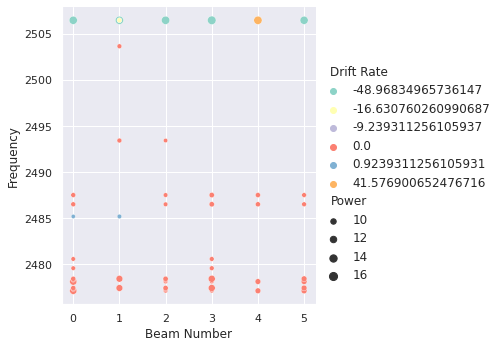

In [16]:
sns.set_theme()
g = sns.relplot(data=info, x="Beam Number", y="Frequency", hue="Drift Rate", size = "Power", palette = "mako_r")

In [11]:
hits_per_fov = []
#print(len(unique_file_path))
for i in range(100):
    hits_per_fov.append(np.count_nonzero(file_path == unique_file_path[i]))

print(hits_per_fov)
#len(np.unique(file_path))

[476, 347, 515, 496, 177, 347, 368, 441, 445, 428, 398, 378, 373, 350, 373, 366, 343, 553, 545, 660, 542, 270, 550, 558, 550, 819, 555, 552, 553, 553, 667, 672, 557, 549, 453, 461, 462, 459, 227, 448, 656, 665, 454, 669, 462, 668, 767, 473, 478, 453, 449, 354, 294, 300, 305, 147, 299, 289, 296, 299, 303, 287, 296, 312, 299, 309, 301, 294, 393, 318, 400, 396, 151, 318, 319, 215, 317, 399, 378, 388, 333, 387, 307, 320, 314, 268, 277, 268, 277, 133, 211, 282, 274, 271, 278, 270, 260, 395, 395, 261]


Then analyze using Seaborn

In [1]:
#type(np.dtype) is type
#print(np.__version__)
#print(pd.__version__)
sns.set_theme()
sns.relplot(data=field_of_view_1, x="ra", y="dec", hue="beam", palette = "Set1")

NameError: name 'sns' is not defined

Let's try putting all of the hits in the same field of view into individual pickle files

Start by selecting all of the hits with the first field of view

In [6]:
subset = df.loc[df['file_path'] == np.unique(file_path)[0]]

In [7]:
with open('fov_1.pkl', 'wb') as f:  # open a text file
    pickle.dump(subset, f) # serialize the list

In [8]:
f.close()

Now let's see if we can automate the pickle files so that we can start to analyze them

In [16]:
#print(df[abs(np.array(df["signal_driftRate"])) > 0])

subset = df[abs(np.array(df["signal_driftRate"])) > 0]

with open('nonzero_drift_rate.pkl', 'wb') as f:  # open a text file
    pickle.dump(subset, f) # serialize the list
    
f.close()

In [94]:
print(hits_per_freq)

print('Indexing for 1: ', [hits_per_freq.index(1), hits_per_freq.index(1, 17), hits_per_freq.index(1, 20), 
                          hits_per_freq.index(1, 41), hits_per_freq.index(1, 49), hits_per_freq.index(1, 51), 
                          hits_per_freq.index(1, 52), hits_per_freq.index(1, 53), hits_per_freq.index(1, 54), 
                          hits_per_freq.index(1, 55), hits_per_freq.index(1, 56)])
print('Indexing for 2: ', [hits_per_freq.index(2, 41), hits_per_freq.index(2, 43), hits_per_freq.index(2, 65)])
print('Indexing for 3: ', [hits_per_freq.index(3, 49)])
print('Indexing for 5: ', [hits_per_freq.index(5, 47), hits_per_freq.index(5, 60), hits_per_freq.index(5, 61)])

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 2, 6, 6, 2, 6, 5, 1, 3, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 5, 6, 6, 6, 5, 2, 1, 6, 6, 6]
Indexing for 1:  [16, 19, 40, 48, 50, 51, 52, 53, 54, 55, 66]
Indexing for 2:  [42, 45, 65]
Indexing for 3:  [49]
Indexing for 5:  [47, 60, 64]


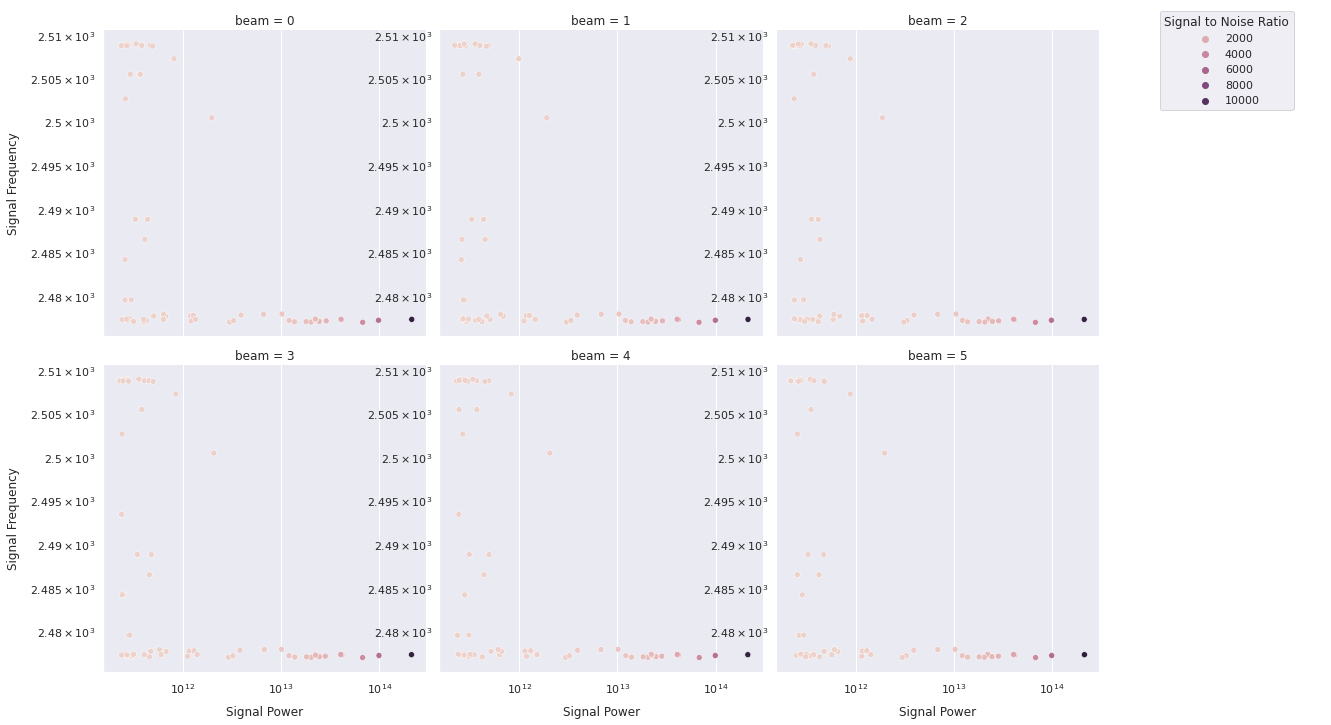

In [37]:
sns.set_theme()
#g, ax = plt.subplots(2,3,figsize=(7, 7))
#ax.set(xscale="log", yscale="log")

g = sns.relplot(data=field_of_view_1, x="signal_power", y="signal_frequency", col="beam", hue="signal_snr", col_wrap = 3) 
g.set(xscale="log", yscale="log")

g.set_axis_labels("Signal Power", "Signal Frequency", labelpad=10)
g.legend.set_title("Signal to Noise Ratio")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#g.figure.set_size_inches(6.5, 5)

#g.ax.margins(.15)

#style="smoker", size="size"

In [43]:
beam = field_of_view_1["beam"]
print('Coherent beam 1 ', np.array(beam).tolist().count(0))
print('Coherent beam 2 ', np.array(beam).tolist().count(1))
print('Coherent beam 3 ', np.array(beam).tolist().count(2))
print('Coherent beam 4 ', np.array(beam).tolist().count(3))
print('Coherent beam 5 ', np.array(beam).tolist().count(4))
print('Incoherent beam ', np.array(beam).tolist().count(5))

Coherent beam 1  57
Coherent beam 2  57
Coherent beam 3  58
Coherent beam 4  60
Coherent beam 5  58
Incoherent beam  57


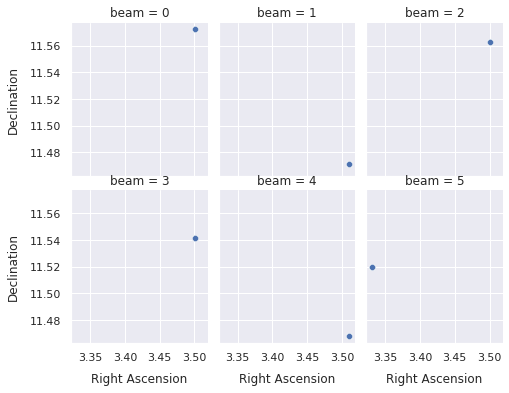

In [49]:
sns.set_theme()
g = sns.relplot(data=field_of_view_1, x="ra", y="dec", col="beam", col_wrap = 3) 

g.set_axis_labels("Right Ascension", "Declination", labelpad=10)
#g.legend.set_title("Signal to Noise Ratio")
#sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.figure.set_size_inches(6.5, 5)